In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [2]:
β_min, β_max = 1, 4
nleadin, nplot = 900, 100
step = 2.5e-4
ϵ = 1e-3

def logistic(x, β):
    return β * x * (1 - x)

xvals = []
for β in np.arange(β_min, β_max, step):
    x = 0.5
    for _ in range(nleadin):
        x = logistic(x, β)
    xss = x
    x = logistic(x, β)
    xvals.append((β, x))
    for _ in range(nplot - 1):
        x = logistic(x, β)
        xvals.append((β, x))
        if np.abs(x - xss) < ϵ:
            break
xvals = np.array(xvals).T

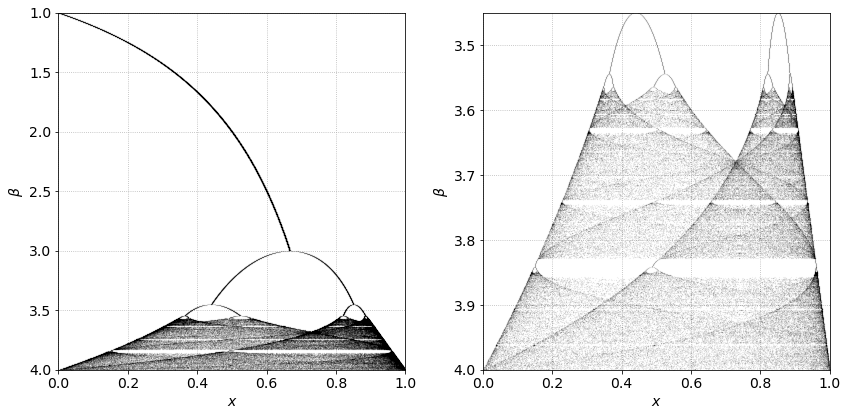

In [3]:
# Figure 7.2
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12, 6))
axs[0].set_ylim(β_min, β_max)
axs[1].set_ylim(3.45, 4)
for ax in axs:
    ax.plot(xvals[1], xvals[0], '.', markersize=0.04, color='black')
    ax.set_xlim(0, 1)
    ax.invert_yaxis()
    ax.set_xlabel('$x$')
    ax.set_ylabel(r'$\beta$')
    ax.grid(True, linestyle=':')

plt.tight_layout();